# NBA Stats Overview

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
team_stats = pd.read_csv('nba_team_stats_2000_to_2016.csv')

In [3]:
def plot_corr(df, col1, col2, title, rx, ry):
    x = df[col1]
    y = df[col2]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    rsqr = r_value**2

    fig, ax = plt.subplots()
    df[[col1,col2]].plot(kind='scatter', x=col1, y=col2, 
                                                           title=title, ax=ax)
    ax.plot(x, intercept+(slope*x))
    ax.text(rx, ry, '$R^2 = %0.4f$'%rsqr, fontsize=20)

## Compare Teams with different Tempo

http://nyloncalculus.com/2015/12/21/nylon-calculus-101-possessions/

### ESPN & NBA Possessions
POSS = 0.5x(FGA + 0.44x(FTA) - ORB + TO))

In [4]:
team_stats['Basic_Poss'] = 0.5*(team_stats['FGA']+team_stats['FGA_Opp'] - team_stats['Off_Reb'] 
                            - team_stats['Off_Reb_Opp'] + 0.44*(team_stats['FTA']+team_stats['FTA_Opp']) 
                            + team_stats['Turnovers'] + team_stats['Turnovers_Opp'])

### BBRef Possessions
POSS = 0.5 x ((FGA + 0.4x(FTA) - 1.07x(OFFREB/(OFFREB+DEFREB_OPP))x(FGA-FGM) + TO) + ((FGA_OPP + 0.4x(FTA_OPP) - 1.07x(OFFREB_OPP/(OFFREB_OPP+DEFREB))x(FGA_OPP-FGM_OPP) + TO_OPP))

In [5]:
team_stats['Adv_Poss'] = 0.5*((team_stats['FGA'] + 0.4205*(team_stats['FTA']) - 
                            1.07*((team_stats['Off_Reb']/(team_stats['Off_Reb']+team_stats['Def_Reb_Opp']))*
                                (team_stats['FGA'] - team_stats['FGM'])) + team_stats['Turnovers']) +
                            (team_stats['FGA_Opp'] + 0.4205*(team_stats['FTA_Opp']) - 
                            1.07*((team_stats['Off_Reb_Opp']/(team_stats['Off_Reb_Opp']+team_stats['Def_Reb']))*
                                (team_stats['FGA_Opp'] - team_stats['FGM_Opp'])) + team_stats['Turnovers_Opp']))

In [6]:
#team_stats[~team_stats['Basic_Poss'].notnull()][['Tm','year','Turnovers']]

In [7]:
team_stats[['Tm','year','Basic_Poss','Adv_Poss']].tail()

,Tm,year,Basic_Poss,Adv_Poss
500,Washington,2012,6287.38,6147.417385
501,Washington,2013,7765.36,7617.283162
502,Washington,2014,7926.44,7775.703514
503,Washington,2015,7924.50,7773.036913
504,Washington,2016,8235.12,8095.314708


### Points Per Game

In [8]:
team_stats['Points'] = team_stats['3PM']*3 + (team_stats['FGM']-team_stats['3PM'])*2 + team_stats['FTM']
team_stats['Points_Per_Game'] = team_stats.apply(lambda row: row['Points']/66 if row['year']==2012 else row['Points']/82, axis=1)

In [9]:
team_stats['Points_Opp'] = team_stats['3PM_Opp']*3 + (team_stats['FGM_Opp']-team_stats['3PM_Opp'])*2 + team_stats['FTM_Opp']
team_stats['Points_Opp_Per_Game'] = team_stats.apply(lambda row: row['Points']/66 if row['year']==2012 else row['Points']/82, axis=1)

In [10]:
team_stats['Points_Diff'] = team_stats['Points'] - team_stats['Points_Opp']

In [11]:
team_stats[['Tm','year','Points_Per_Game']].sort_values('Points_Per_Game', ascending=False).head(10)

,Tm,year,Points_Per_Game
164,Golden State,2016,114.890244
156,Golden State,2008,111.036585
122,Denver,2008,110.658537
391,Phoenix,2005,110.414634
396,Phoenix,2010,110.231707
351,Oklahoma City,2016,110.219512
393,Phoenix,2007,110.207317
394,Phoenix,2008,110.073171
163,Golden State,2015,109.951220
395,Phoenix,2009,109.439024


In [12]:
team_stats['Offensive_Rating'] = (team_stats['Points'] / team_stats['Adv_Poss'])*100

In [13]:
team_stats['Defensive_Rating'] = (team_stats['Points_Opp'] /team_stats['Adv_Poss'])*100

In [14]:
team_stats[['Tm','year',
            'Points_Per_Game', 'Offensive_Rating']].sort_values('Points_Per_Game', 
                                                                ascending=False).head(10)

,Tm,year,Points_Per_Game,Offensive_Rating
164,Golden State,2016,114.890244,114.516729
156,Golden State,2008,111.036585,111.147217
122,Denver,2008,110.658537,109.343504
391,Phoenix,2005,110.414634,113.961840
396,Phoenix,2010,110.231707,114.706581
351,Oklahoma City,2016,110.219512,113.082178
393,Phoenix,2007,110.207317,113.380635
394,Phoenix,2008,110.073171,112.750498
163,Golden State,2015,109.951220,111.657096
395,Phoenix,2009,109.439024,112.959026


In [15]:
team_stats[['Tm','year',
            'Points_Per_Game', 'Points','Offensive_Rating', 'Adv_Poss']].sort_values('Offensive_Rating', 
                                                                ascending=False).head(10)

,Tm,year,Points_Per_Game,Points,Offensive_Rating,Adv_Poss
396,Phoenix,2010,110.231707,9039.0,114.706581,7880.105852
164,Golden State,2016,114.890244,9421.0,114.516729,8226.745622
391,Phoenix,2005,110.414634,9054.0,113.961840,7944.764653
393,Phoenix,2007,110.207317,9037.0,113.380635,7970.496930
412,Portland,2009,99.426829,8153.0,113.278200,7197.324841
479,Utah,2008,106.219512,8710.0,113.101508,7701.046766
351,Oklahoma City,2016,110.219512,9038.0,113.082178,7992.417716
395,Phoenix,2009,109.439024,8974.0,112.959026,7944.473604
394,Phoenix,2008,110.073171,9026.0,112.750498,8005.286115
263,Miami,2013,102.878049,8436.0,112.743804,7482.451102


In [16]:
team_stats[['Tm','year',
            'Points_Opp_Per_Game', 'Defensive_Rating', 'Points_Opp']].sort_values('Points_Opp_Per_Game').head(10)

,Tm,year,Points_Opp_Per_Game,Defensive_Rating,Points_Opp
117,Denver,2003,84.158537,100.721566,7580.0
63,Chicago,2000,84.780488,104.030399,7723.0
458,Toronto,2004,85.439024,99.874548,7253.0
253,Miami,2003,85.560976,101.821021,7430.0
58,Charlotte,2012,86.954545,109.829221,6657.0
252,Miami,2002,87.195122,99.680631,7276.0
64,Chicago,2001,87.573171,106.667122,7927.0
373,Philadelphia,2004,87.987805,101.300172,7419.0
306,New Orleans,2005,88.439024,107.111956,7832.0
475,Utah,2004,88.670732,102.620050,7371.0


In [17]:
team_stats[['Tm','year',
            'Points_Opp_Per_Game', 'Defensive_Rating']].sort_values('Defensive_Rating').head(10)

,Tm,year,Points_Opp_Per_Game,Defensive_Rating
441,San Antonio,2004,91.475610,93.590140
135,Detroit,2004,90.097561,94.890136
186,Indiana,2004,91.378049,96.706141
438,San Antonio,2001,96.170732,97.422148
387,Phoenix,2001,94.024390,97.446097
38,Brooklyn,2004,90.256098,97.496538
37,Brooklyn,2003,95.365854,97.535722
216,LA Lakers,2000,100.817073,97.651396
319,New York,2001,88.719512,97.658717
29,Boston,2012,91.848485,97.771582


### Pace
Pace = (POS / MP) * 48

## Calculate 4 Factors Team

### Effective Field Goals
EFG = (FG + 0.5(3PM))/FGA

In [18]:
team_stats['Effective_Field_Goal'] = (team_stats['FGM'] + 0.5*(team_stats['3PM']))/ (team_stats['FGA'])
team_stats['Def_Effective_Field_Goal'] = (team_stats['FGM_Opp'] + 
                                          0.5*(team_stats['3PM_Opp']))/ (team_stats['FGA_Opp'])
team_stats['EFG_Diff'] = team_stats['Effective_Field_Goal'] - team_stats['Def_Effective_Field_Goal']

In [19]:
team_stats[['3PM','FGM','FGA','3PA','Tm',
            'year','Effective_Field_Goal']].sort_values('Effective_Field_Goal', ascending=False).head()

,3PM,FGM,FGA,3PA,Tm,year,Effective_Field_Goal
164,1077.0,3489.0,7159.0,2592.0,Golden State,2016,0.562579
264,665.0,3142.0,6272.0,1829.0,Miami,2014,0.553970
263,717.0,3148.0,6348.0,1809.0,Miami,2013,0.552379
393,785.0,3388.0,6855.0,1965.0,Phoenix,2007,0.551495
394,694.0,3392.0,6782.0,1764.0,Phoenix,2008,0.551312


### Turnover Percentage per Possession
TO% = TO / POSS

In [20]:
team_stats['TO_Pct_Poss'] = (team_stats['Turnovers'])/ (team_stats['Adv_Poss'])*100
team_stats['Def_TO_Pct_Poss'] = (team_stats['Turnovers_Opp'])/ (team_stats['Adv_Poss'])*100
team_stats['TO_Pct_Diff'] = team_stats['TO_Pct_Poss'] - team_stats['Def_TO_Pct_Poss']

In [21]:
team_stats[['Turnovers','Adv_Poss','Tm',
            'year','TO_Pct_Poss']].sort_values('TO_Pct_Poss', ascending=True).head()

,Turnovers,Adv_Poss,Tm,year,TO_Pct_Poss
61,916.0,7692.947925,Charlotte,2015,11.907009
62,973.0,7906.631401,Charlotte,2016,12.306126
381,738.0,5972.851183,Philadelphia,2012,12.355908
100,949.0,7666.600592,Dallas,2003,12.378368
214,967.0,7776.580032,LA,2015,12.434772


### Offensive Rebound Percentage
OReb% = ORB / (ORB + DRB_OPP)

In [22]:
team_stats['Off_Reb_Pct'] = (team_stats['Off_Reb'])/ (team_stats['Off_Reb']+team_stats['Def_Reb_Opp'])*100
team_stats['Def_Reb_Pct'] = (team_stats['Off_Reb_Opp'])/ (team_stats['Off_Reb_Opp']+team_stats['Def_Reb'])*100
team_stats['Reb_Pct_Diff'] = team_stats['Off_Reb_Pct'] - team_stats['Def_Reb_Pct']

In [23]:
team_stats[['Off_Reb','Def_Reb_Opp','Tm',
            'year','Off_Reb_Pct']].sort_values('Off_Reb_Pct', ascending=False).head()

,Off_Reb,Def_Reb_Opp,Tm,year,Off_Reb_Pct
150,1334.0,2450.0,Golden State,2002,35.253700
151,1284.0,2388.0,Golden State,2003,34.967320
475,1103.0,2131.0,Utah,2004,34.106370
473,1109.0,2204.0,Utah,2002,33.474193
149,1345.0,2693.0,Golden State,2001,33.308569


### Offensive Free Throw Rate
Off_FTR = FTM/FGA

In [24]:
team_stats['FT_Pct'] = (team_stats['FTM'])/ (team_stats['FTA'])
team_stats['Off_FTR'] = (team_stats['FTM'])/ (team_stats['FGA'])
team_stats['Def_FTR'] = (team_stats['FTM_Opp'])/ (team_stats['FGA_Opp'])
team_stats['FTR_Diff'] = team_stats['Off_FTR'] - team_stats['Def_FTR']

In [25]:
team_stats[['FTM','FTA','Tm',
            'year','FT_Pct','Off_FTR']].sort_values('Off_FTR', ascending=False).head()

,FTM,FTA,Tm,year,FT_Pct,Off_FTR
324,1878.0,2587.0,New York,2006,0.725937,0.302610
346,1977.0,2401.0,Oklahoma City,2011,0.823407,0.299138
131,1956.0,2506.0,Detroit,2000,0.780527,0.294800
473,1853.0,2430.0,Utah,2002,0.762551,0.290712
123,1891.0,2487.0,Denver,2009,0.760354,0.290476


## Predicting Point Differential

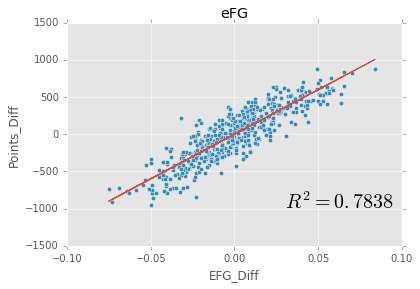

In [26]:
plot_corr(team_stats, 'EFG_Diff', 'Points_Diff', 'eFG', .03, -1000)

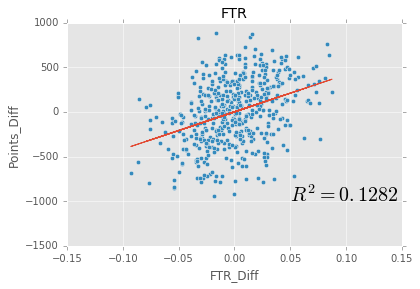

In [27]:
plot_corr(team_stats, 'FTR_Diff', 'Points_Diff', 'FTR', .05, -1000)

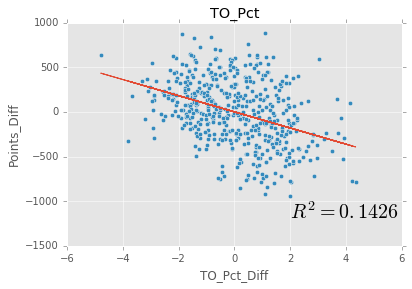

In [28]:
plot_corr(team_stats, 'TO_Pct_Diff', 'Points_Diff', 'TO_Pct', 2, -1200)

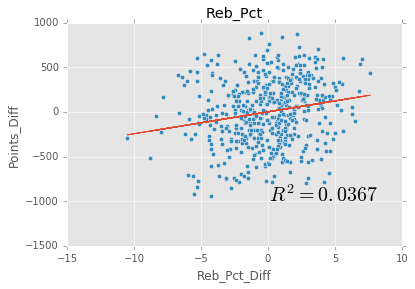

In [29]:
plot_corr(team_stats, 'Reb_Pct_Diff', 'Points_Diff', 'Reb_Pct', .05, -1000)

## Show how eFG% and TS% improve on pure shooting percentage

In [30]:
player_df = pd.read_csv('nba_player_1996_2016.csv')
player_df = player_df[~(player_df['Tm']=='TOT')].reset_index(drop=True)

In [32]:
player_df['type'].unique()
#player_df[]

array(['per_game', 'totals', 'per_minute', 'per_poss', 'advanced'], dtype=object)

In [31]:
player_df_pg = player_df[(player_df['type']=='per_game')].reset_index(drop=True)
player_df_pg = player_df_pg.dropna(axis=1,how='all')
player_df_pg['G_pct'] = player_df_pg.apply(lambda row: row['G_per_game']/66 if row['year'] == '2012' 
                                     else row['G_per_game']/82, axis=1)
player_df_pg = player_df_pg[player_df_pg['G_pct']>0.7073].reset_index(drop=True)
player_df_pg[['Player','Tm','year','Pos','PS/G_per_game','eFG%_per_game']].sort_values('PS/G_per_game', ascending=False).head(10)

,Player,Tm,year,Pos,PS/G_per_game,eFG%_per_game
2101,Kobe Bryant,LAL,2006,SG,35.4,0.491
2175,Allen Iverson*,PHI,2006,PG,33.0,0.467
1524,Tracy McGrady,ORL,2003,SG,32.1,0.505
3944,Kevin Durant,OKC,2014,SF,32.0,0.560
2338,Kobe Bryant,LAL,2007,SG,31.6,0.502
1239,Allen Iverson*,PHI,2002,SG,31.4,0.422
2180,LeBron James,CLE,2006,SF,31.4,0.515
1014,Allen Iverson*,PHI,2001,SG,31.1,0.447
1956,Allen Iverson*,PHI,2005,PG,30.7,0.453
102,Michael Jordan*,CHI,1996,SG,30.4,0.525


In [40]:
player_df_pg[['Player','Tm','year','Pos','PS/G_per_game','eFG%_per_game']].sort_values('eFG%_per_game', ascending=False).head(10)

,Player,Tm,year,Pos,PS/G_per_game,eFG%_per_game
3982,Ryan Hollins,LAC,2014,PF,2.3,0.736
3867,Chris Wilcox,BOS,2013,C,4.2,0.719
4244,DeAndre Jordan,LAC,2015,C,11.5,0.711
4467,DeAndre Jordan,LAC,2016,C,12.7,0.703
3379,DeAndre Jordan,LAC,2011,C,7.1,0.686
3508,Tyson Chandler,NYK,2012,C,11.3,0.679
4109,Brandan Wright,DAL,2014,C,9.1,0.677
4000,DeAndre Jordan,LAC,2014,C,10.4,0.676
4247,Kyle Korver,ATL,2015,SG,12.1,0.671
4165,Tyson Chandler,DAL,2015,C,10.3,0.666


In [41]:
player_df_adv = player_df[(player_df['type']=='advanced')].reset_index(drop=True)
player_df_adv = player_df_adv.dropna(axis=1,how='all')
player_df_adv['G_pct'] = player_df_adv.apply(lambda row: row['G_advanced']/66 if row['year'] == '2012' 
                                     else row['G_advanced']/82, axis=1)
player_df_adv = player_df_adv[player_df_adv['G_pct']>0.7073].reset_index(drop=True)
player_df_adv[['Player','Tm','year','Pos','USG%_advanced']].sort_values('USG%_advanced', ascending=False).head(10)

,Player,Tm,year,Pos,USG%_advanced
2101,Kobe Bryant,LAL,2006,SG,38.7
4336,Russell Westbrook,OKC,2015,PG,38.4
1239,Allen Iverson*,PHI,2002,SG,37.8
2999,Dwyane Wade,MIA,2009,SG,36.2
1250,Michael Jordan*,WAS,2002,SF,36.0
1014,Allen Iverson*,PHI,2001,SG,35.9
2175,Allen Iverson*,PHI,2006,PG,35.8
3500,Kobe Bryant,LAL,2012,SG,35.7
3643,Carmelo Anthony,NYK,2013,PF,35.6
4397,DeMarcus Cousins,SAC,2016,C,35.4


In [42]:
player_df_adv[['Player','Tm','year','Pos','OWS_advanced']].sort_values('OWS_advanced', ascending=False).head(20)

,Player,Tm,year,Pos,OWS_advanced
3944,Kevin Durant,OKC,2014,SF,14.8
3755,LeBron James,MIA,2013,PF,14.6
102,Michael Jordan*,CHI,1996,SG,14.2
4403,Stephen Curry,GSW,2016,PG,13.8
2897,LeBron James,CLE,2009,SF,13.7
3703,Kevin Durant,OKC,2013,SF,13.6
2234,Dirk Nowitzki,DAL,2006,PF,13.5
2951,Chris Paul,NOH,2009,PG,13.3
3137,LeBron James,CLE,2010,SF,13.3
327,Michael Jordan*,CHI,1997,SG,13.3
